<img src="figs/logocimat.png" height="20%" width="20%"  align="center"/>

<center> Estadística y computación para metagenómica<center>

<center> Víctor Muñiz Sánchez <center>

# Suport Vector Machines

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set()
from sklearn.svm import SVC # Support vector classifier
from sklearn.datasets import make_blobs
%matplotlib inline

# Colormap
from matplotlib import colors
from matplotlib import cm
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.colormaps.register(cmap)

## Un ejemplo con datos sintéticos

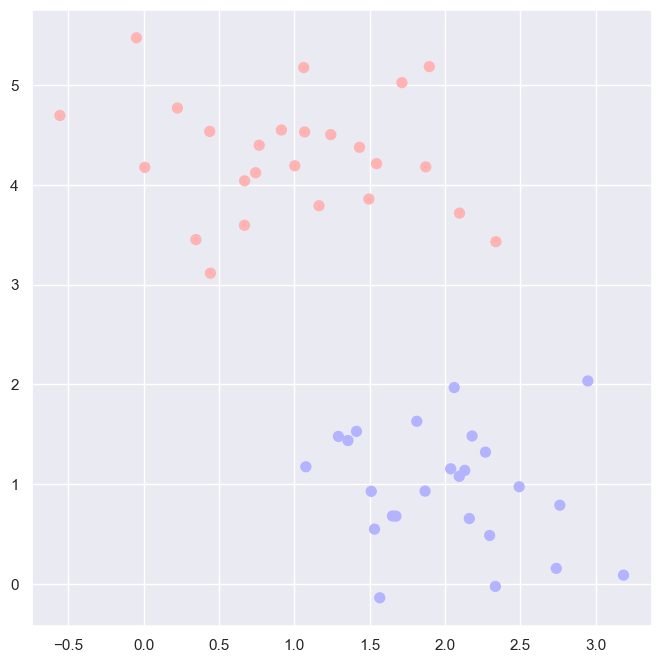

In [2]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

plt.rcParams['figure.figsize'] = (8, 8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='red_blue_classes')
plt.show()

### Márgenes para diferentes clasificadores lineales

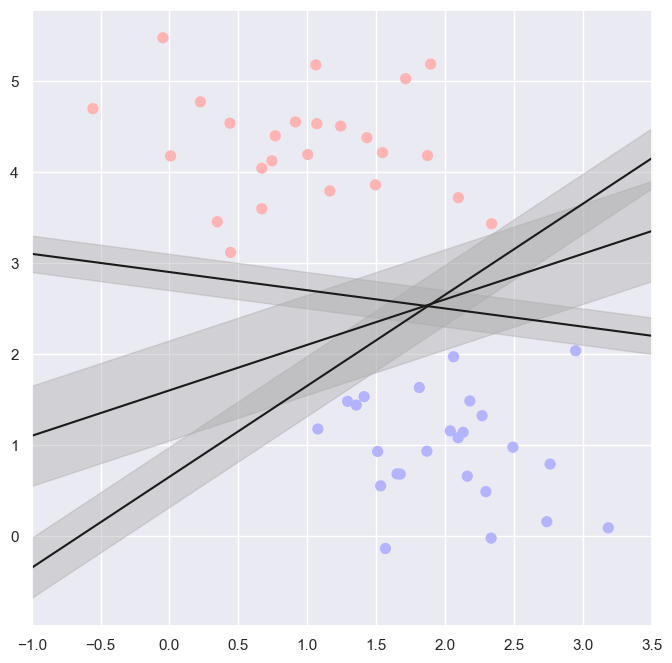

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='red_blue_classes')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

### Ajustamos el clasificador con SVM

In [4]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [5]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Gráfico de la región de clasificación y vectores de soporte

In [3]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors = 'none', edgecolors='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


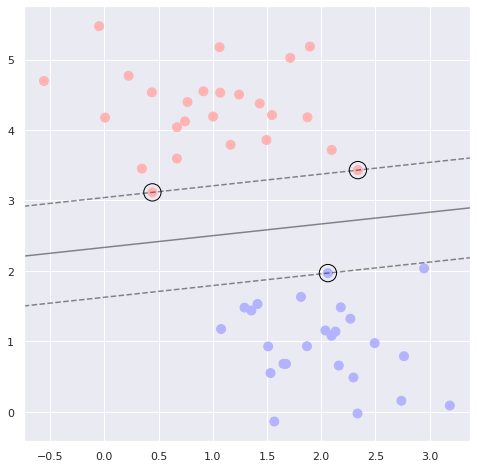

In [11]:
aa = plt.scatter(X[:, 0], X[:, 1], c=y, s=80, cmap='red_blue_classes')
plot_svc_decision_function(model)

### SVM para diferentes `n`

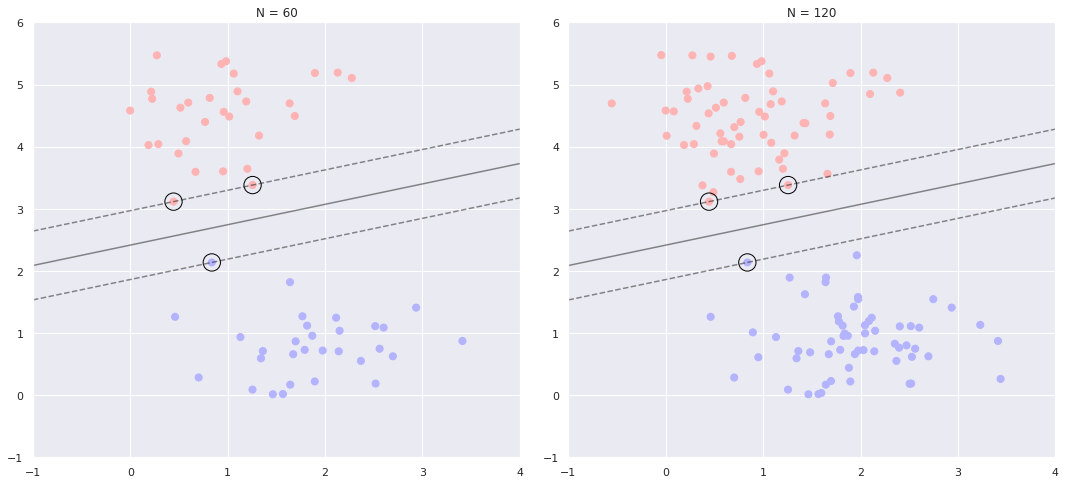

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [6]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='red_blue_classes')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

In [7]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 60, 120, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 60, 120, 200), value=10), Output()), _dom_classes…

## Soft margins

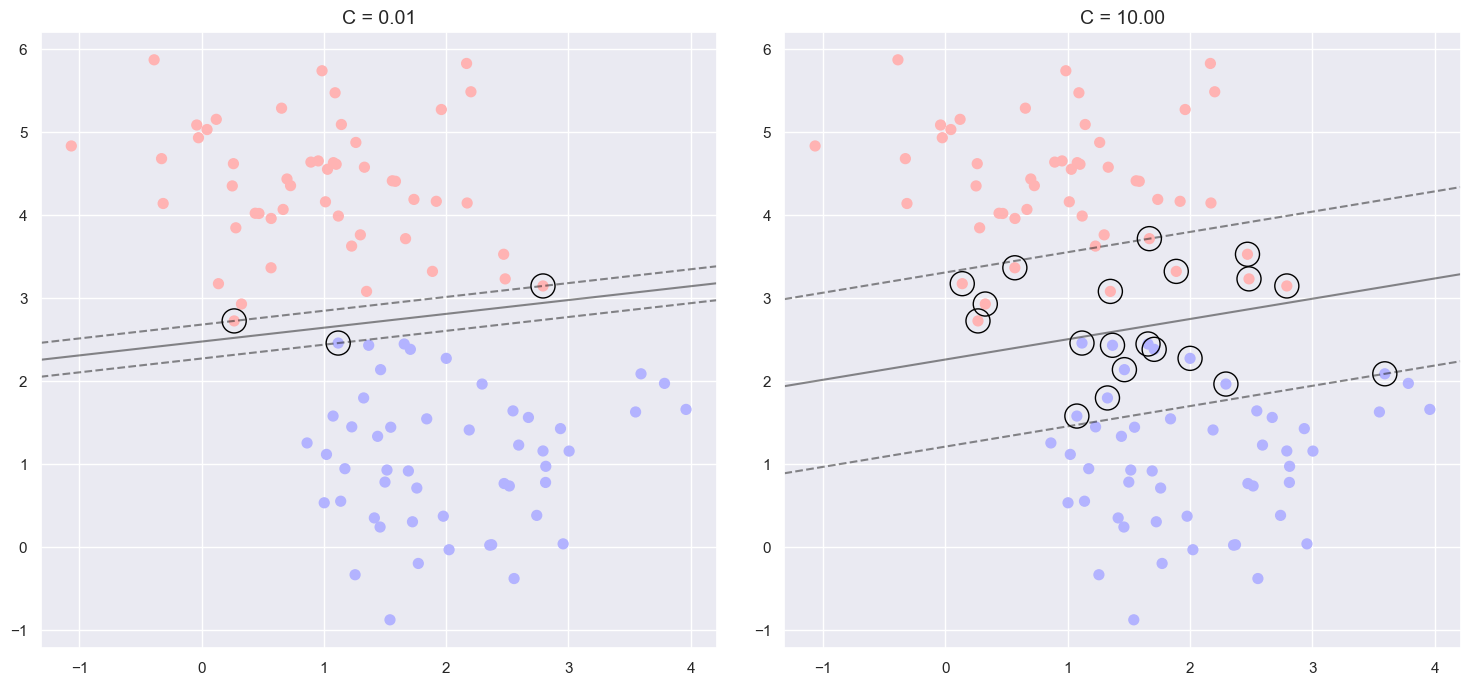

In [7]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [100.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='red_blue_classes')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.2f}'.format(1/C), size=14)

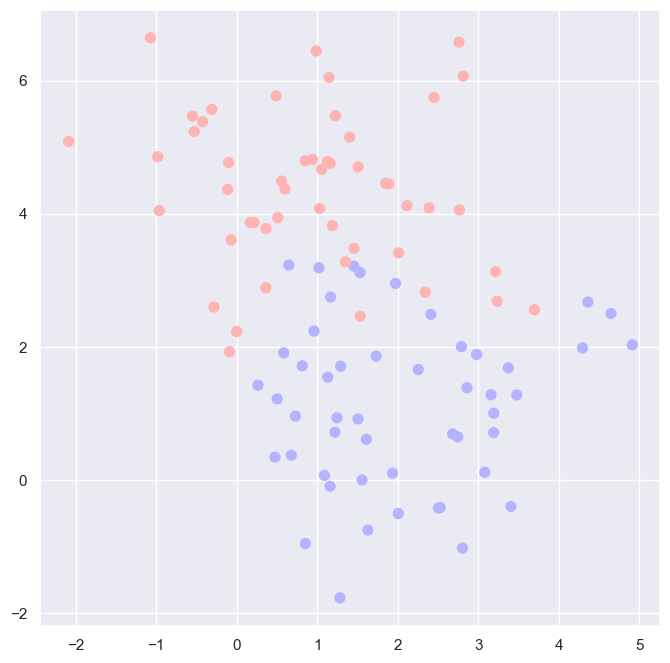

In [8]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='red_blue_classes');

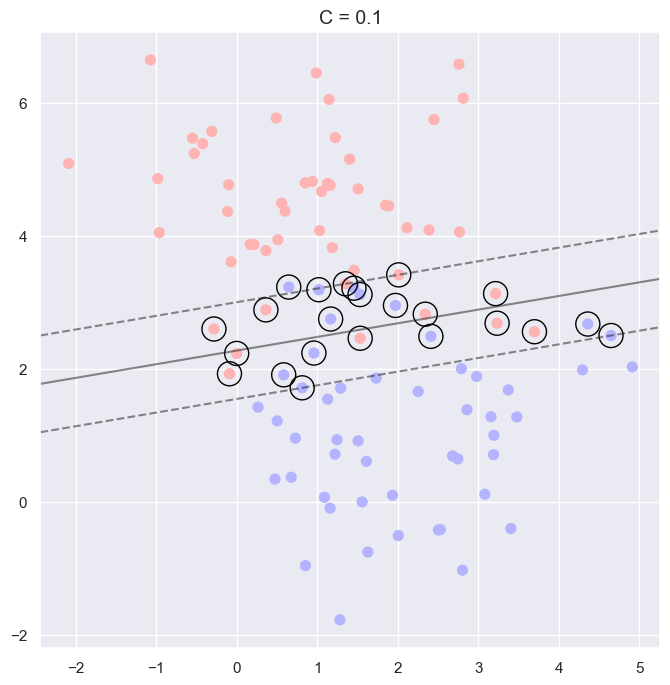

In [10]:
plt.rcParams['figure.figsize'] = (8, 8)
X, y = make_blobs(n_samples=100, centers=2,random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='red_blue_classes')

c = 10
model = SVC(kernel='linear', C=c).fit(X, y)
plot_svc_decision_function(model)
plt.title('C = {0:.1f}'.format(1/c), size=14);


## SVM no lineal

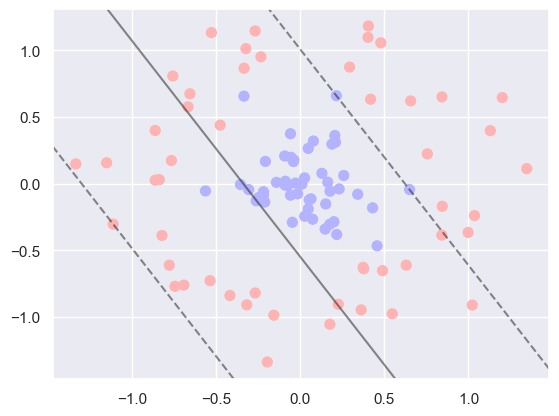

In [4]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.2, random_state=42)

clf = SVC(kernel='linear',C=2.5).fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='red_blue_classes')
plot_svc_decision_function(clf, plot_support=False);

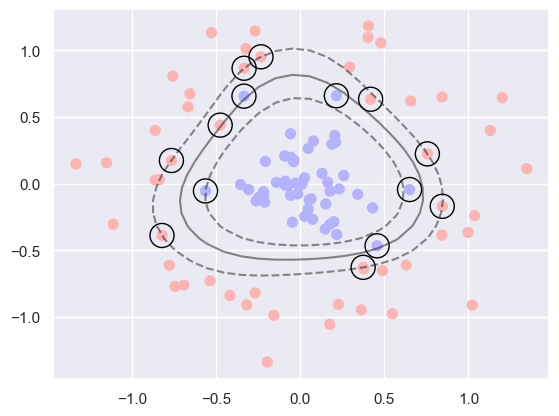

In [5]:
clf = SVC(kernel='rbf', C=10)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='red_blue_classes')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

## SVM multiclase

In [6]:
X, y = make_blobs(n_samples=100, centers=4, random_state=0, cluster_std=0.60)

svm = SVC(kernel='linear').fit(X, y)
svm

SVC(kernel='linear')

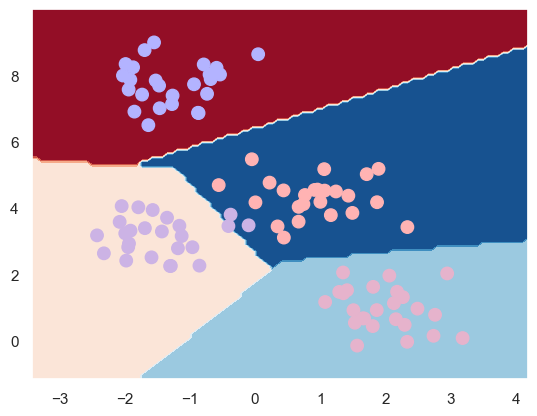

In [7]:
num = 100
# el rango de valores
xrange = np.linspace(np.min(X[:,0])-1, np.max(X[:,0])+1, num = num)
yrange = np.linspace(np.min(X[:,1])-1, np.max(X[:,1])+1, num = num)
## hago el grid
xx, yy = np.meshgrid(xrange, yrange)
mesh = np.column_stack((np.reshape(xx,(-1,1)),np.reshape(yy,(-1,1))))
pred = svm.predict(mesh)
Z = np.reshape(pred,(-1,num))

plt.contourf(xx,yy,Z,cmap = cm.RdBu_r)
plt.scatter(X[:, 0], X[:, 1], c=y, s=80, cmap='red_blue_classes')
plt.show()

Mejor usar las funciones de `mlxtend`:

/Users/vmac/virtualenv/ml24/lib/python3.11/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: >

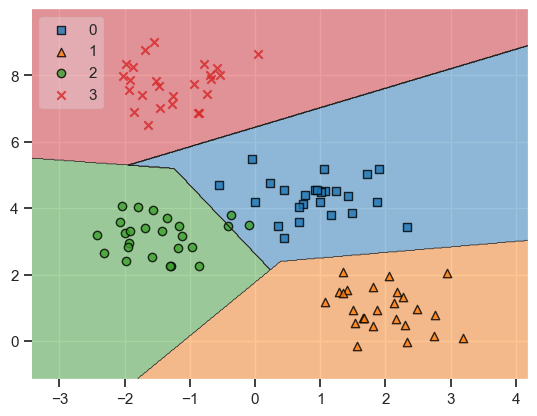

In [9]:
from mlxtend.plotting import plot_decision_regions

svm = SVC(kernel='linear').fit(X, y)

plot_decision_regions(X, y, clf=svm, legend=2)

/Users/vmac/virtualenv/ml24/lib/python3.11/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: >

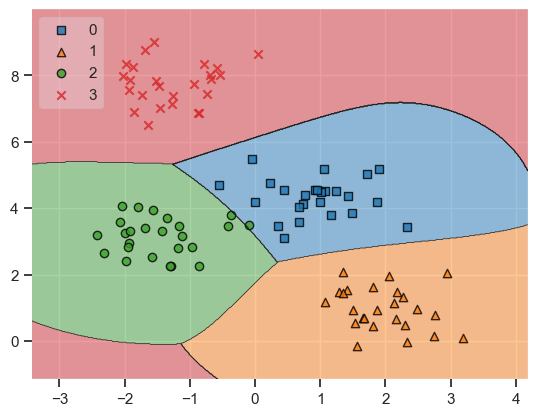

In [11]:
svm = SVC(kernel='rbf', gamma=.5, C=.1).fit(X, y)

plot_decision_regions(X, y, clf=svm, legend=2)